In [3]:
import math as m
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
 
#zad 1
 
def interpolacja(x, y):
    
    if len(x) != len(y):
        return
    
    if len(x)==0:
        return
    
    def f(t):
        suma = 0
        for i in range(len(x)):
            wielomian = 1
            for j in range(len(x)):
                if(i != j):
                    wielomian *= (t - x[j])/(x[i] - x[j])
            suma += y[i] * wielomian
        return suma
    return f
 
print("sprawdzenie:")
print("Dla f(0) = 0, f(1) = 1, f(2) = 4, oczekiwana funkcja: x(t) = t^2")
w1 = interpolacja([0, 1, 2], [0, 1, 4])
print("Wartosci dla t = 0, 1, 2, 3:", w1(0), w1(1), w1(2), w1(3))

sprawdzenie:
Dla f(0) = 0, f(1) = 1, f(2) = 4, oczekiwana funkcja: x(t) = t^2
Wartosci dla t = 0, 1, 2, 3: 0.0 1.0 4.0 9.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


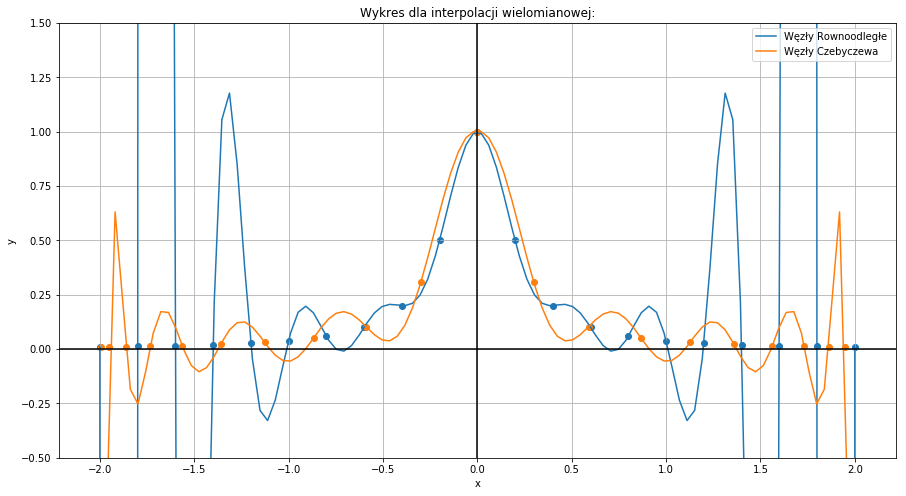

In [16]:
#zad 2
f = lambda x: 1/(25*x**2 + 1)
a = -2
b = 2
n = 21
x = np.linspace(-2,2,100)

rownoodlegleX = np.linspace(-2, 2, 21)
czebyszewX   = np.array([(a + b) / 2 + (((b - a)/2) * m.cos(m.pi * (2 * k + 1) / (2 * n))) for k in range(1, n)])

# Funkcje interpolujące
wielomian_rownoodlegle = np.poly1d(np.polyfit(rownoodlegleX, f(rownoodlegleX), deg=(n - 1)))
wielomian_czebyszew  = np.poly1d(np.polyfit(czebyszewX, f(czebyszewX), deg=(n - 1)))

spline_rownoodlegle = spi.interp1d(rownoodlegleX, f(rownoodlegleX), 3, fill_value='extrapolate')
spline_czebyszew  = spi.interp1d(czebyszewX, f(czebyszewX), 3, fill_value='extrapolate')

# Wartości funkcji interpolujących
rownoodlegle_wartosci = wielomian_rownoodlegle(x)
czebyszew_wartosci = wielomian_czebyszew(abs(x))

rownoodlegle_wartosci_spline = spline_rownoodlegle(x)
czebyszew_wartosci_spline = spline_czebyszew(x)

plt.figure(figsize=(15,8))
plt.plot(x, rownoodlegle_wartosci, label='Węzły Rownoodległe')
plt.plot(x, czebyszew_wartosci, label='Węzły Czebyczewa')
plt.scatter(rownoodlegleX, wielomian_rownoodlegle(rownoodlegleX))
plt.scatter(czebyszewX, wielomian_czebyszew(czebyszewX))
plt.title('Wykres dla interpolacji wielomianowej:')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.ylim(-0.5,1.5)
plt.grid()
plt.show()

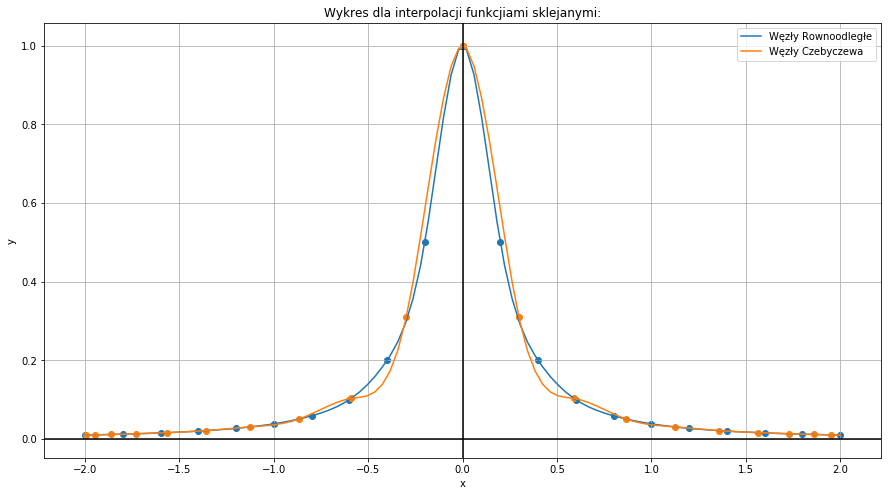

In [17]:
plt.figure(figsize=(15,8))
plt.plot(x, rownoodlegle_wartosci_spline, label='Węzły Rownoodległe')
plt.plot(x, czebyszew_wartosci_spline, label='Węzły Czebyczewa')
plt.scatter(rownoodlegleX, wielomian_rownoodlegle(rownoodlegleX))
plt.scatter(czebyszewX, wielomian_czebyszew(czebyszewX))
plt.title('Wykres dla interpolacji funkcjiami sklejanymi:')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.grid()
plt.show()

In [13]:

#Przy użyciu interpolacji wielomianowej mamy do czynienia z efektem Rungego, pogorszenia jakości interpolacji wielomianowej, 
#mimo zwiększenia liczby jej węzłów. Początkowo ze wzrostem liczby węzłów n przybliżenie poprawia się,
#jednak po dalszym wzroście n, zaczyna się pogarszać, co jest szczególnie widoczne na końcach przedziałów.

#Dla funkcji sklejanych unikamy tego efektu, ponieważ funkcja otrzymana składa się z lokalnie interpolujących funkcji

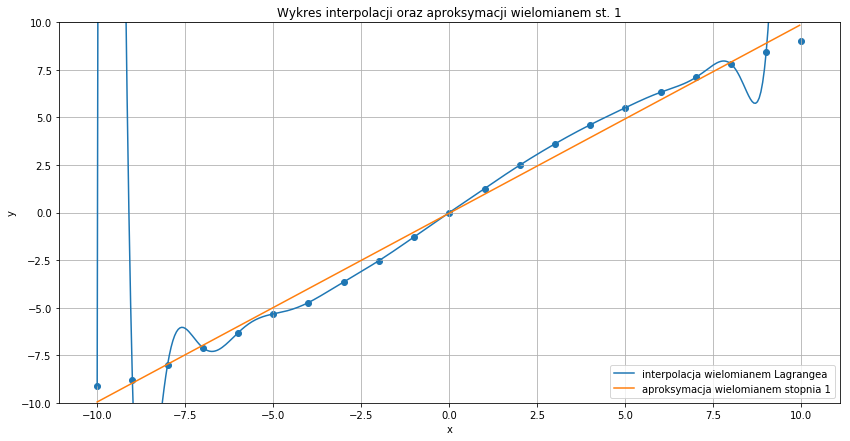

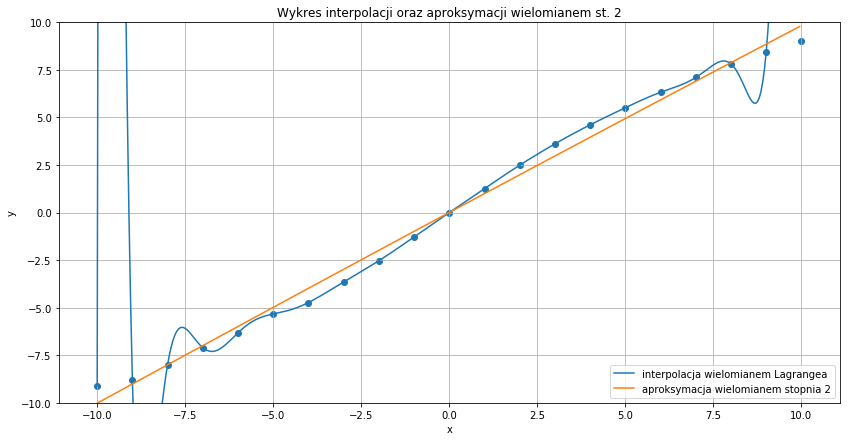

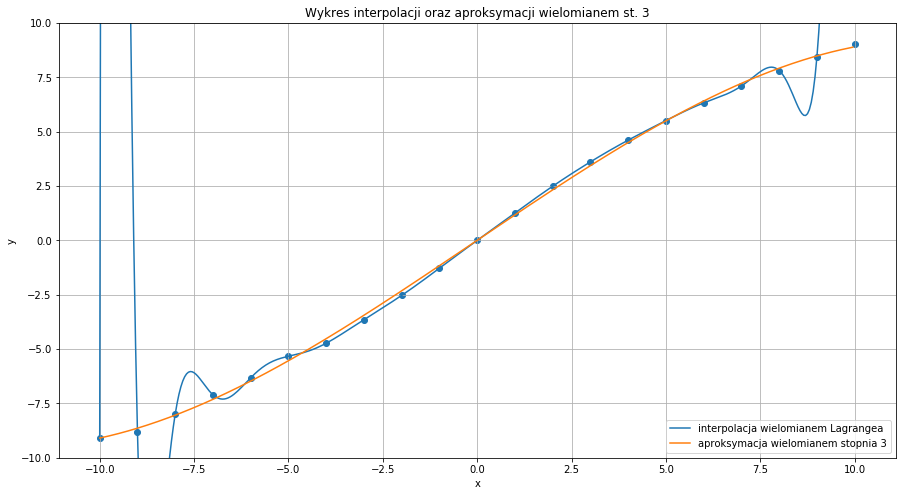

In [18]:
#zad 3

napiecie = np.array([x for x in range(-10, 11)])
predkosc = np.array([-9.1, -8.82, -7.99, -7.1, -6.32, -5.33, -4.73, -3.65, -2.53, -1.28, 
                  0.0, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.1, 7.81, 8.45, 9.02])

#print(napiecie)
#print(predkosc)

x1 = np.arange(-10,10,0.05)                        
w = interpolacja(napiecie, predkosc)
w_Y = w(x1)
aproksymacja1 = np.poly1d(np.polyfit(napiecie,predkosc, deg=1))
aproksymacja2 = np.poly1d(np.polyfit(napiecie,predkosc, deg=2))
aproksymacja3 = np.poly1d(np.polyfit(napiecie,predkosc, deg=3))
a1_Y = aproksymacja1(x1)
a2_Y = aproksymacja2(x1)
a3_Y = aproksymacja3(x1)

plt.figure(figsize=(14,7))
plt.plot(x1,w_Y,label="interpolacja wielomianem Lagrangea")
plt.plot(x1,a1_Y,label="aproksymacja wielomianem stopnia 1")
plt.scatter(napiecie,predkosc)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,10)
plt.legend()
plt.grid()
plt.title('Wykres interpolacji oraz aproksymacji wielomianem st. 1')
plt.show()

plt.figure(figsize=(14,7))
plt.plot(x1,w_Y,label="interpolacja wielomianem Lagrangea")
plt.plot(x1,a2_Y,label="aproksymacja wielomianem stopnia 2")
plt.scatter(napiecie,predkosc)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,10)
plt.legend()
plt.grid()
plt.title('Wykres interpolacji oraz aproksymacji wielomianem st. 2')
plt.show()

plt.figure(figsize=(15,8))
plt.plot(x1,w_Y,label="interpolacja wielomianem Lagrangea")
plt.plot(x1,a3_Y,label="aproksymacja wielomianem stopnia 3")
plt.scatter(napiecie,predkosc)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,10)
plt.legend()
plt.grid()
plt.title('Wykres interpolacji oraz aproksymacji wielomianem st. 3')
plt.show()
                               


In [15]:
#zad 4

czas = [x for x in range(0, 4)]
polozenie = [0.0, 42.7, 73.2, 92.5]

W1 = interpolacja(polozenie,czas)

czas_spotkania = W1(79.6)

W2 = interpolacja(czas,polozenie)

dt = 0.001
dx = W2(czas_spotkania + dt) - W2(czas_spotkania)
predkosc = dx/dt


print("czas miniecia fotoradaru [s]: ", czas_spotkania)
print("predkosc w momencie miniecia fotoradaru [m/s]: ", predkosc)

czas miniecia fotoradaru [s]:  2.2916950833167666
predkosc w momencie miniecia fotoradaru [m/s]:  21.50343742519567
